<a href="https://colab.research.google.com/github/gkakani1/GOUTHAM-DATA606/blob/main/Code/EDA/weather_datasets_EDA/EAD_of_Weather_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project

## Exploratory data analysis of Weather dataset

##  Mounting Google Drive files

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing required modules and functions 

In [28]:
import glob
import pandas as pd
import re 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Creating a dataframe from all the weather excel files

In [29]:
path = "/content/drive/MyDrive/Capstone/Datasets/Weather Dataset/" # Path to my weather datasets in google drive(Accessible to UMBC group members)
files = glob.glob(path+"*") #Using glob module to return the fies in weather datasets 
print(files) # Printing all the food crop files path
print("No:of files in the directory : ",len(files)) # Checking no:of files in the list 

['/content/drive/MyDrive/Capstone/Datasets/Weather Dataset/Andhra Pradesh.xlsx', '/content/drive/MyDrive/Capstone/Datasets/Weather Dataset/Maharashtra.xlsx', '/content/drive/MyDrive/Capstone/Datasets/Weather Dataset/Madhya Pradesh.xlsx', '/content/drive/MyDrive/Capstone/Datasets/Weather Dataset/Kerala.xlsx', '/content/drive/MyDrive/Capstone/Datasets/Weather Dataset/Jharkhand.xlsx', '/content/drive/MyDrive/Capstone/Datasets/Weather Dataset/Arunachal Pradesh.xlsx', '/content/drive/MyDrive/Capstone/Datasets/Weather Dataset/Gujarat.xlsx', '/content/drive/MyDrive/Capstone/Datasets/Weather Dataset/West Bengal.xlsx', '/content/drive/MyDrive/Capstone/Datasets/Weather Dataset/Haryana.xlsx', '/content/drive/MyDrive/Capstone/Datasets/Weather Dataset/Assam.xlsx', '/content/drive/MyDrive/Capstone/Datasets/Weather Dataset/Goa.xlsx', '/content/drive/MyDrive/Capstone/Datasets/Weather Dataset/Chhattisgarh.xlsx', '/content/drive/MyDrive/Capstone/Datasets/Weather Dataset/Himachal Pradesh.xlsx', '/content

In [30]:
xlsx_files  = glob.glob(path+"/*")# Storing the paths of all the excel files into a list 
xlsx_files # Printing all the excel files

['/content/drive/MyDrive/Capstone/Datasets/Weather Dataset/Andhra Pradesh.xlsx',
 '/content/drive/MyDrive/Capstone/Datasets/Weather Dataset/Maharashtra.xlsx',
 '/content/drive/MyDrive/Capstone/Datasets/Weather Dataset/Madhya Pradesh.xlsx',
 '/content/drive/MyDrive/Capstone/Datasets/Weather Dataset/Kerala.xlsx',
 '/content/drive/MyDrive/Capstone/Datasets/Weather Dataset/Jharkhand.xlsx',
 '/content/drive/MyDrive/Capstone/Datasets/Weather Dataset/Arunachal Pradesh.xlsx',
 '/content/drive/MyDrive/Capstone/Datasets/Weather Dataset/Gujarat.xlsx',
 '/content/drive/MyDrive/Capstone/Datasets/Weather Dataset/West Bengal.xlsx',
 '/content/drive/MyDrive/Capstone/Datasets/Weather Dataset/Haryana.xlsx',
 '/content/drive/MyDrive/Capstone/Datasets/Weather Dataset/Assam.xlsx',
 '/content/drive/MyDrive/Capstone/Datasets/Weather Dataset/Goa.xlsx',
 '/content/drive/MyDrive/Capstone/Datasets/Weather Dataset/Chhattisgarh.xlsx',
 '/content/drive/MyDrive/Capstone/Datasets/Weather Dataset/Himachal Pradesh.xlsx

In [31]:
len(xlsx_files)

29

### Working on a sample dataframe 

In [32]:
df_samp1 = pd.read_excel(xlsx_files[0], header=None)  # Creating a sample dataframe from one of the excel files

In [33]:
df_samp1.head(30)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-BEGIN HEADER-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NASA/POWER CERES/MERRA2 Native Resolution Mont...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dates (month/day/year): 01/01/2011 through 12/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Location: Latitude 15.6576 Longitude 79.7139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Elevation from MERRA-2: Average for 0.5 x 0.62...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Value for missing model data cannot be compute...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Parameter(s):,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,QV2M MERRA-2 Specific Humidi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,T2MDEW MERRA-2 Dew/Frost Point...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,GWETTOP MERRA-2 Surface Soil We...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
len(df_samp1.columns) # No:od columns in dataframe

15

### Appending all the individual dataframes 

In [35]:
df_original = pd.DataFrame() # Creating an empty dataframe

for i in xlsx_files:
  df_samp1 = pd.read_excel(i,header = None)
  list_States = []
  list_States.append(i[57:-5])
  df_samp1.columns = df_samp1.iloc[20].tolist() #
  df_samp1 = df_samp1.iloc[21:,:] # deleting top 20 rows from our dataframe
  df_samp1["STATE"] = i[57:-5] # Adding values into "State" column 
  df_original = df_original.append(df_samp1) # Appending each individual dataframe into df_orginal
df_original.reset_index(drop=True, inplace=True) # Resetting the index values 
len(df_original)




3480

In [36]:
df_original 

,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN,STATE
0,QV2M,2011,13.24,13.85,14.22,16.78,17.15,16.3,16.91,17.76,17.82,17.33,15.2,14.16,15.93,Andhra Pradesh
1,QV2M,2012,13.43,12.45,15.14,16.78,16.48,15.75,17.21,17.21,17.88,16.97,15.62,14.53,15.81,Andhra Pradesh
2,QV2M,2013,13.67,13.55,14.34,16.97,17.09,17.21,17.09,18.07,18.62,18.49,16.05,12.94,16.17,Andhra Pradesh
3,QV2M,2014,13.37,13,13.61,15.81,17.88,16.66,17.09,17.64,18.01,17.15,15.08,13.98,15.81,Andhra Pradesh
4,QV2M,2015,12.63,12.63,14.65,16.48,17.03,17.76,16.97,18.07,18.31,17.03,16.72,14.59,16.11,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,ALLSKY_SFC_PAR_TOT,2016,58.29,67.38,78.41,103.91,110.83,110.43,87.1,89.94,102.73,89.57,78.35,66.13,86.9,Uttarakhand
3476,ALLSKY_SFC_PAR_TOT,2017,42.59,69.73,83.58,103.07,105.02,102.67,82.55,89.15,90.41,91.52,68.34,56.77,82.12,Uttarakhand
3477,ALLSKY_SFC_PAR_TOT,2018,65.9,69.2,85.05,100.3,114.82,107.41,89.02,77.3,86.97,84.4,63.91,57.34,83.52,Uttarakhand
3478,ALLSKY_SFC_PAR_TOT,2019,44.3,50.59,77.84,104.38,109.43,116.81,84.57,89.22,89.44,80.69,55.48,51.98,79.67,Uttarakhand


In [37]:
list_Parameters = df_original.PARAMETER.unique().tolist() # List of all the parameters in the datasets

In [38]:
list_Parameters

['QV2M',
 'T2MDEW',
 'GWETTOP',
 'T2M_MAX',
 'T2M_MIN',
 'GWETPROF',
 'GWETROOT',
 'WS2M_MAX',
 'WS2M_MIN',
 'CLOUD_AMT',
 'PRECTOTCORR',
 'ALLSKY_SFC_PAR_TOT']

In [39]:
len(list_Parameters) == 12

True

In [40]:
list_Year = df_original.YEAR.unique().tolist() # List of unique years in dataset

In [41]:
list_Year

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [42]:
len(list_Year) == 10

True

In [43]:
list_States = df_original.STATE.unique().tolist() # List of unique states in the dataset

In [44]:
list_States

['Andhra Pradesh',
 'Maharashtra',
 'Madhya Pradesh',
 'Kerala',
 'Jharkhand',
 'Arunachal Pradesh',
 'Gujarat',
 'West Bengal',
 'Haryana',
 'Assam',
 'Goa',
 'Chhattisgarh',
 'Himachal Pradesh',
 'Jhammu & Kashmir',
 'Karnataka',
 'Bihar',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand']

In [45]:
len(list_States)

29

In [46]:
# Checking for any null values
df_original.replace(0,np.nan)
df_original.isnull().sum()

PARAMETER    0
YEAR         0
JAN          0
FEB          0
MAR          0
APR          0
MAY          0
JUN          0
JUL          0
AUG          0
SEP          0
OCT          0
NOV          0
DEC          0
ANN          0
STATE        0
dtype: int64

## Visualizing using Relplot.

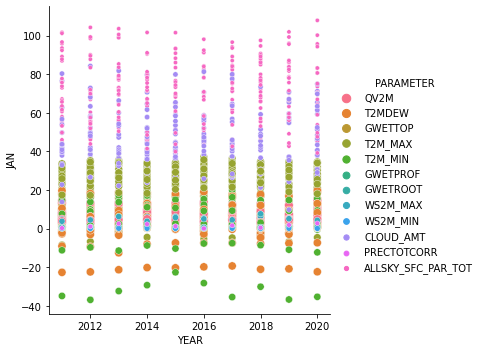

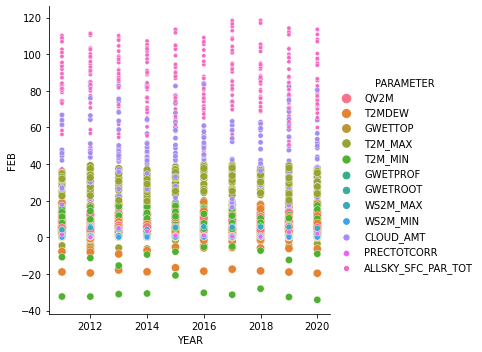

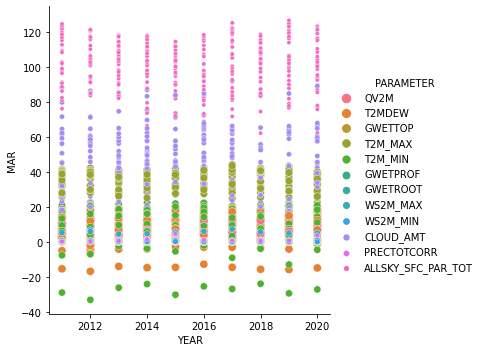

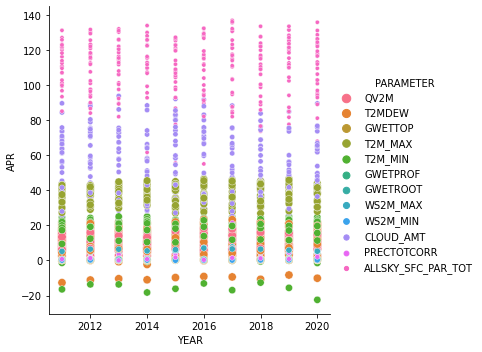

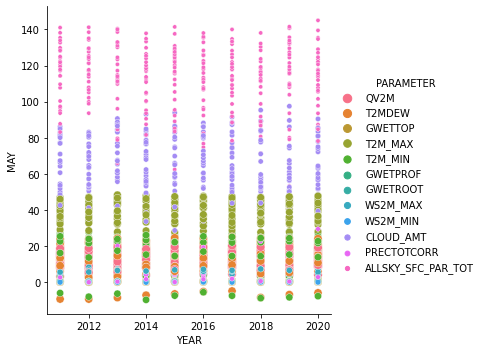

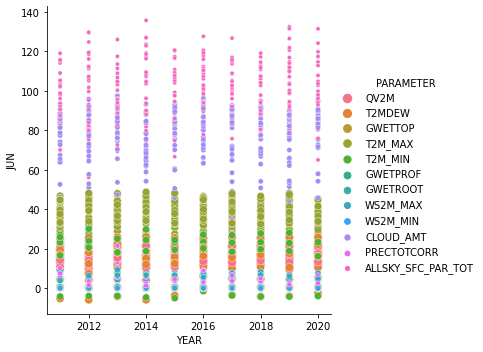

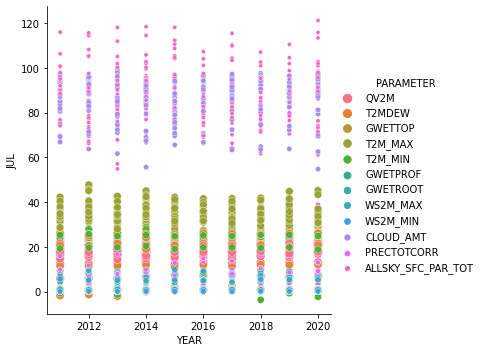

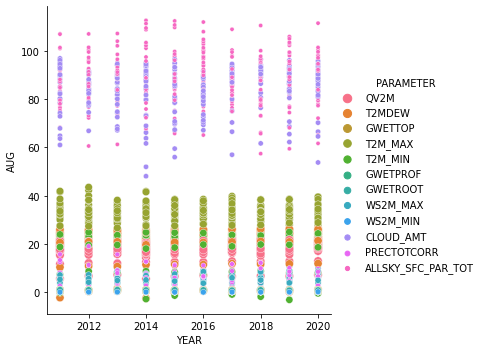

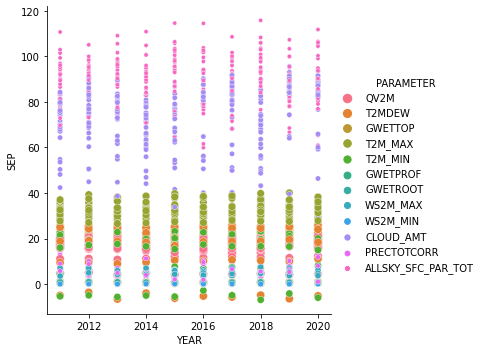

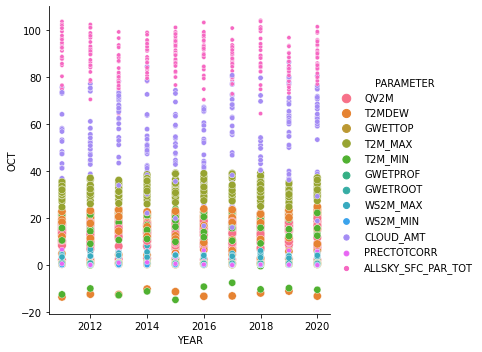

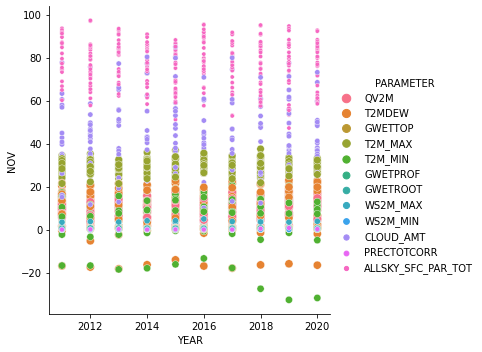

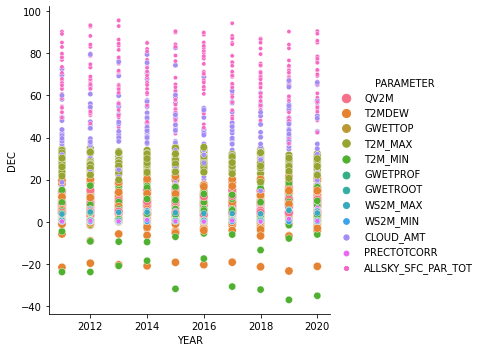

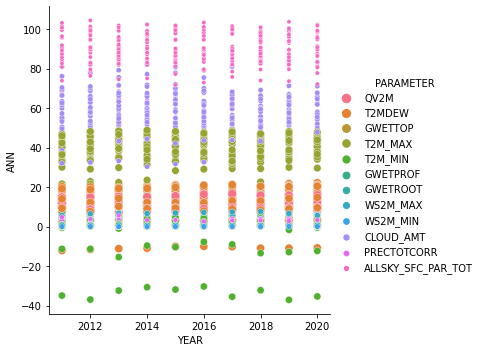

In [47]:
head_list1 = df_original.columns.values.tolist() # Header values of columns 
for i in head_list1[2:-1]: # Taking header values of the columns that has values
  sns.relplot(
    data=df_original, x="YEAR", y="{}".format(i),
    hue = "PARAMETER",size= "PARAMETER",
    kind="scatter"
  )


In [48]:
result = df_original.groupby('PARAMETER').agg({'JAN': ['mean', 'min', 'max'],'FEB': ['mean', 'min', 'max']})

In [49]:
#a = head_list1[2:-2]
# Finding min, max and mean values of each PARAMETER
df_test = ((df_original.groupby('PARAMETER').agg({'JAN': ['mean', 'min', 'max']})))
for i in head_list1[3:-2]:
  b = ((df_original.groupby('PARAMETER').agg({i: ['mean', 'min', 'max']})))
  print(b)
 

                          FEB               
                         mean    min     max
PARAMETER                                   
ALLSKY_SFC_PAR_TOT  84.857207  37.40  118.49
CLOUD_AMT           41.524793   8.04   86.59
GWETPROF             0.524621   0.29    0.81
GWETROOT             0.519759   0.29    0.77
GWETTOP              0.416069   0.11    0.79
PRECTOTCORR          0.664207   0.00    5.01
QV2M                 7.067172   1.28   14.22
T2MDEW               6.234138 -19.61   19.44
T2M_MAX             30.105241  -6.19   39.83
T2M_MIN              7.401552 -34.13   20.23
WS2M_MAX             4.353862   0.73   10.73
WS2M_MIN             0.099517   0.00    0.73
                           MAR               
                          mean    min     max
PARAMETER                                    
ALLSKY_SFC_PAR_TOT  100.539931  56.05  126.78
CLOUD_AMT            44.180828   9.20   92.16
GWETPROF              0.511379   0.29    0.78
GWETROOT              0.506241   0.28    0.75
GWE

## Writing the final weather dataset into an excel file named Final_Weather_Dataset

In [50]:
df_original.to_excel(r'/content/drive/MyDrive/Capstone/Datasets/Final_Datasets/Final_Wether_Dataset.xlsx', index = False)# Downloading final weather dataset into google drive